# 04 tiering archetypes Notebook

This notebook implements the analysis for the 04 tiering archetypes stage of the Fantasy Football Analysis project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# TODO: Implement 04 tiering archetypes analysis

In [3]:
# Import project modules
from src.data.data_loader import load_config, load_all_data
from src.data.data_loader import load_csv_data
from src.analysis.tiering import (
    identify_player_tiers,
    identify_player_archetypes,
    analyze_tiers_vs_expectations
)
from src.visualization.tiering_vis import (
    plot_player_tiers,
    plot_player_archetypes,
    plot_tier_expectations
)
from src.utils.validation import validate_analysis_output

# Set pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [4]:
# 1. Load configuration and processed data
config = load_config()
vorp_df = load_csv_data(os.path.join(config['data_paths']['processed_data'], 'vorp_analysis.csv'))


2025-03-28 21:00:38,383 - INFO - Configuration loaded from config/config.yaml
2025-03-28 21:00:38,387 - INFO - Loading data from data/processed/vorp_analysis.csv
2025-03-28 21:00:38,402 - INFO - Loaded dataframe with shape: (629, 274)
2025-03-28 21:00:38,403 - WARNING - Missing values detected in data/processed/vorp_analysis.csv:
2025-03-28 21:00:38,403 - WARNING -   - Rushing Y/A: 307 missing values
2025-03-28 21:00:38,404 - WARNING -   - Receiving Y/R: 172 missing values
2025-03-28 21:00:38,404 - WARNING -   - 2PM: 585 missing values
2025-03-28 21:00:38,404 - WARNING -   - 2PP: 607 missing values
2025-03-28 21:00:38,405 - WARNING -   - Season_preseason: 453 missing values
2025-03-28 21:00:38,405 - WARNING -   - Tiers: 453 missing values
2025-03-28 21:00:38,405 - WARNING -   - Position: 453 missing values
2025-03-28 21:00:38,405 - WARNING -   - Team_preseason: 453 missing values
2025-03-28 21:00:38,406 - WARNING -   - Team (Alt)_preseason: 453 missing values
2025-03-28 21:00:38,406 - 

In [5]:
# 2. Identify performance tiers
tier_results = identify_player_tiers(vorp_df)

# Display tier stats for each position
positions = ['QB', 'RB', 'WR', 'TE']
for pos in positions:
    tier_stats_key = f"{pos}_tier_stats"
    if tier_stats_key in tier_results:
        print(f"\n{pos} Performance Tiers:")
        display(tier_results[tier_stats_key])

2025-03-28 21:00:38,545 - INFO - Identifying player performance tiers
/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_v


QB Performance Tiers:


,Tier,Avg_Points,Std_Dev,Min_Points,Max_Points,Player_Count,Example_Players
0,Tier 1,315.296250,51.306224,248.54,428.38,16,"Lamar Jackson, Josh Allen, Joe Burrow"
1,Tier 2,145.497273,43.930364,93.48,227.86,22,"Jordan Love, C.J. Stroud, Matthew Stafford"
2,Tier 3,19.896098,23.025326,-2.08,78.14,41,"Drew Lock, Deshaun Watson, Spencer Rattler"



RB Performance Tiers:


,Tier,Avg_Points,Std_Dev,Min_Points,Max_Points,Player_Count,Example_Players
0,Tier 1,235.046667,50.031775,174.1,336.9,24,"Jahmyr Gibbs, Saquon Barkley, Derrick Henry"
1,Tier 2,102.531429,31.338088,60.8,165.9,35,"Zach Charbonnet, Tyrone Tracy, Kenneth Walker III"
2,Tier 3,16.465909,16.819945,-2.0,57.3,88,"Jeremy McNichols, Kenneth Gainwell, Ezekiel El..."



WR Performance Tiers:


,Tier,Avg_Points,Std_Dev,Min_Points,Max_Points,Player_Count,Example_Players
0,Tier 1,187.674000,39.224823,141.5,339.5,40,"Ja'Marr Chase, Justin Jefferson, Amon-Ra St. B..."
1,Tier 2,90.056129,24.117324,51.1,136.2,62,"Wan'Dale Robinson, George Pickens, Michael Pit..."
2,Tier 3,11.625676,14.190136,-3.2,49.9,148,"Brandon Aiyuk, Lil'Jordan Humphrey, Curtis Samuel"



TE Performance Tiers:


,Tier,Avg_Points,Std_Dev,Min_Points,Max_Points,Player_Count,Example_Players
0,Tier 1,163.620000,26.959509,135.8,206.7,10,"Brock Bowers, George Kittle, Trey McBride"
1,Tier 2,81.475484,20.148488,47.8,112.5,31,"David Njoku, Hunter Henry, Cade Otton"
2,Tier 3,10.667961,12.680487,0.0,44.9,103,"Tommy Tremble, Josh Whyle, Luke Schoonmaker"


In [6]:
# 3. Identify player archetypes
# Define features for each position
position_features = {
    'QB': ['Pass_Points_Share', 'Rush_Points_Share', 'Pass_Yards_Per_Att', 'TD_Rate', 'Int_Rate'],
    'RB': ['Rush_Points_Share', 'Recv_Points_Share', 'Rush_Yards_Per_Att', 'Catch_Rate'],
    'WR': ['Yards_Per_Reception', 'Catch_Rate', 'TD_Rate', 'YPRR', 'aDOT'],
    'TE': ['Yards_Per_Reception', 'Catch_Rate', 'TD_Rate', 'YPRR', 'Route_Rate', 'Inline_Rate']
}

archetype_results = identify_player_archetypes(vorp_df, position_features)

# Display archetype stats for each position
for pos in positions:
    archetype_stats_key = f"{pos}_archetype_stats"
    feature_key = f"{pos}_archetype_features"
    
    if archetype_stats_key in archetype_results:
        print(f"\n{pos} Archetypes:")
        display(archetype_results[archetype_stats_key])
        
        if feature_key in archetype_results:
            print(f"\n{pos} Archetype Feature Means:")
            display(archetype_results[feature_key])


2025-03-28 21:00:39,100 - INFO - Identifying player archetypes
2025-03-28 21:00:39,102 - WARNING - Missing features for QB archetype identification: ['Rush_Points_Share']
2025-03-28 21:00:39,104 - WARNING - Not enough QB players with complete feature data, skipping
2025-03-28 21:00:39,107 - WARNING - Missing features for RB archetype identification: ['Rush_Points_Share']
2025-03-28 21:00:39,107 - WARNING - Not enough RB players with complete feature data, skipping
2025-03-28 21:00:39,108 - WARNING - Missing features for WR archetype identification: ['Yards_Per_Reception', 'YPRR', 'aDOT']
2025-03-28 21:00:39,110 - WARNING - Not enough WR players with complete feature data, skipping
2025-03-28 21:00:39,111 - WARNING - Missing features for TE archetype identification: ['Yards_Per_Reception', 'YPRR']
/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au


TE Archetypes:


,Archetype,Avg_Points,Std_Dev,Min_Points,Max_Points,Player_Count,Example_Players
0,Archetype 1: Balanced,51.639394,52.877585,0.0,206.7,66,"Brock Bowers, George Kittle, Jonnu Smith"
1,Archetype 2: Low Route Rate + High Inline Rate,17.064000,14.927153,0.0,54.8,25,"Josh Oliver, Nick Vannett, Adam Trautman"
2,Archetype 3: High TD Rate + Low Catch Rate,7.200000,NaN,7.2,7.2,1,E.J. Jenkins



TE Archetype Feature Means:


,Archetype,Catch_Rate,TD_Rate,Route_Rate,Inline_Rate
0,Archetype 1: Balanced,0.741382,4.420538,87.012121,42.319697
1,Archetype 2: Low Route Rate + High Inline Rate,0.618642,7.327553,65.368000,79.188000
2,Archetype 3: High TD Rate + Low Catch Rate,0.500000,100.000000,76.900000,46.200000


In [7]:
# 4. Analyze tiers vs expectations
tier_expectations = analyze_tiers_vs_expectations(tier_results, vorp_df)

# Display tier expectations analysis
for pos in positions:
    expectations_key = f"{pos}_tier_expectations"
    if expectations_key in tier_expectations:
        print(f"\n{pos} Tier Expectations Analysis:")
        display(tier_expectations[expectations_key])

2025-03-28 21:00:39,134 - INFO - Analyzing tiers vs. expectations
2025-03-28 21:00:39,156 - INFO - Tier vs. expectations analysis completed



QB Tier Expectations Analysis:


,Tier,Avg_ADP,Avg_Points,Player_Count,Expected_Round,Success_Rate,Points_per_ADP
0,Tier 1,101.833333,315.296250,16,9.0,0.437500,3.096199
1,Tier 2,156.153846,145.497273,22,14.0,0.045455,0.931756
2,Tier 3,178.000000,19.896098,41,15.0,0.000000,0.111776



RB Tier Expectations Analysis:


,Tier,Avg_ADP,Avg_Points,Player_Count,Expected_Round,Success_Rate,Points_per_ADP
0,Tier 1,54.700000,235.046667,24,5.0,0.750000,4.297014
1,Tier 2,118.181818,102.531429,35,10.0,0.228571,0.867574
2,Tier 3,155.142857,16.465909,88,13.0,0.022727,0.106134



WR Tier Expectations Analysis:


,Tier,Avg_ADP,Avg_Points,Player_Count,Expected_Round,Success_Rate,Points_per_ADP
0,Tier 1,66.735294,187.674000,40,6.0,0.550000,2.812215
1,Tier 2,126.304348,90.056129,62,11.0,0.145161,0.713009
2,Tier 3,171.181818,11.625676,148,15.0,0.000000,0.067914



TE Tier Expectations Analysis:


,Tier,Avg_ADP,Avg_Points,Player_Count,Expected_Round,Success_Rate,Points_per_ADP
0,Tier 1,97.000000,163.620000,10,9.0,0.30000,1.686804
1,Tier 2,154.222222,81.475484,31,13.0,0.16129,0.528299
2,Tier 3,170.000000,10.667961,103,15.0,0.00000,0.062753


<Figure size 1200x800 with 0 Axes>

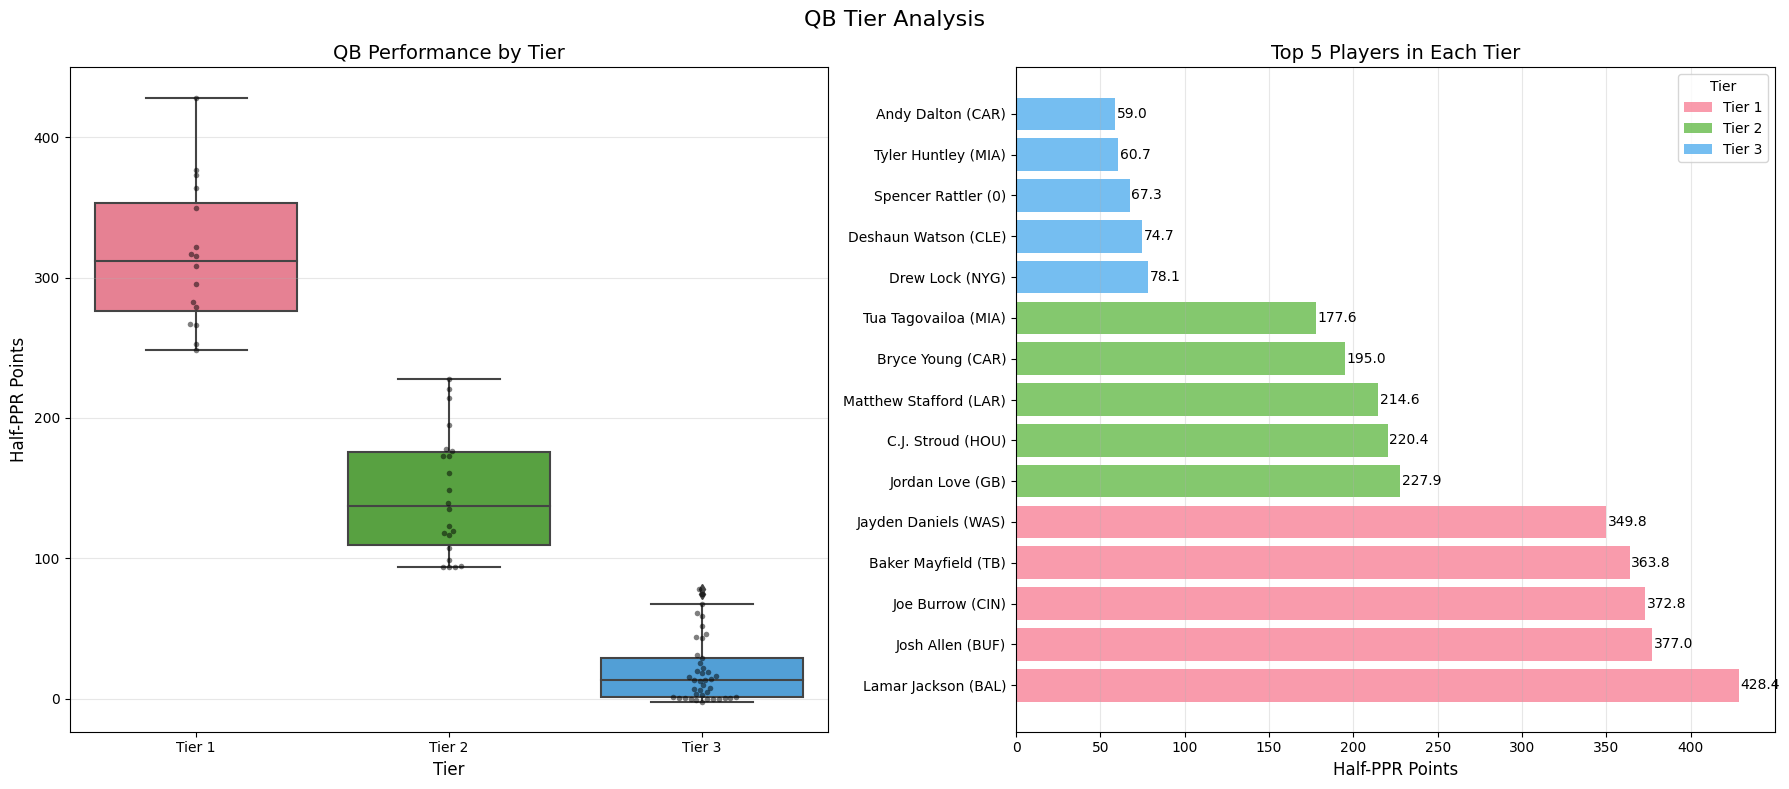

<Figure size 1200x800 with 0 Axes>

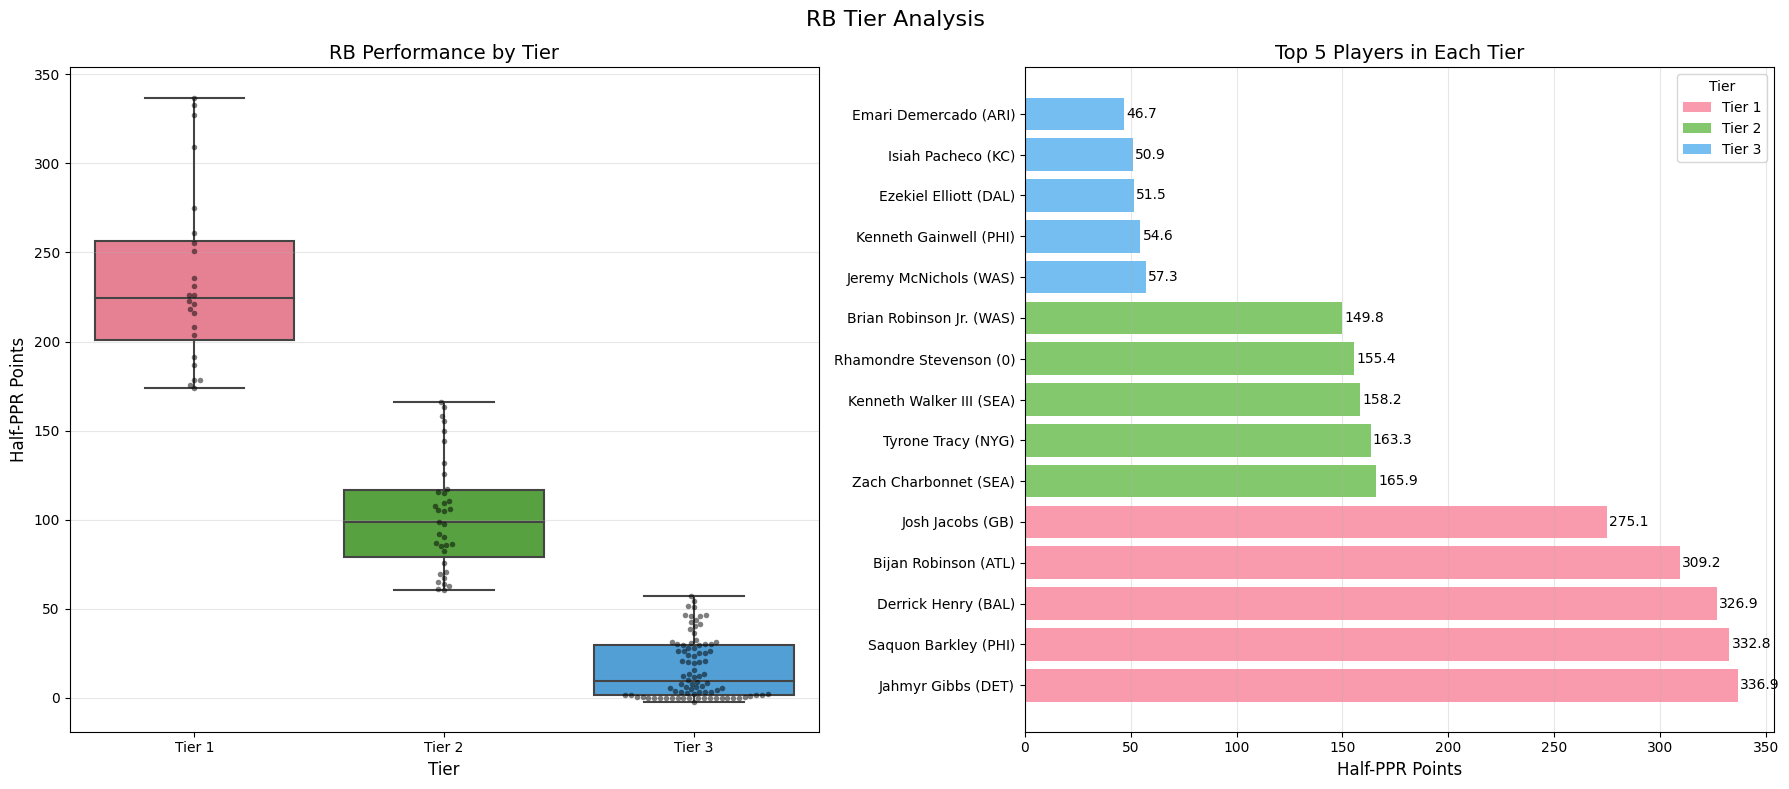

/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

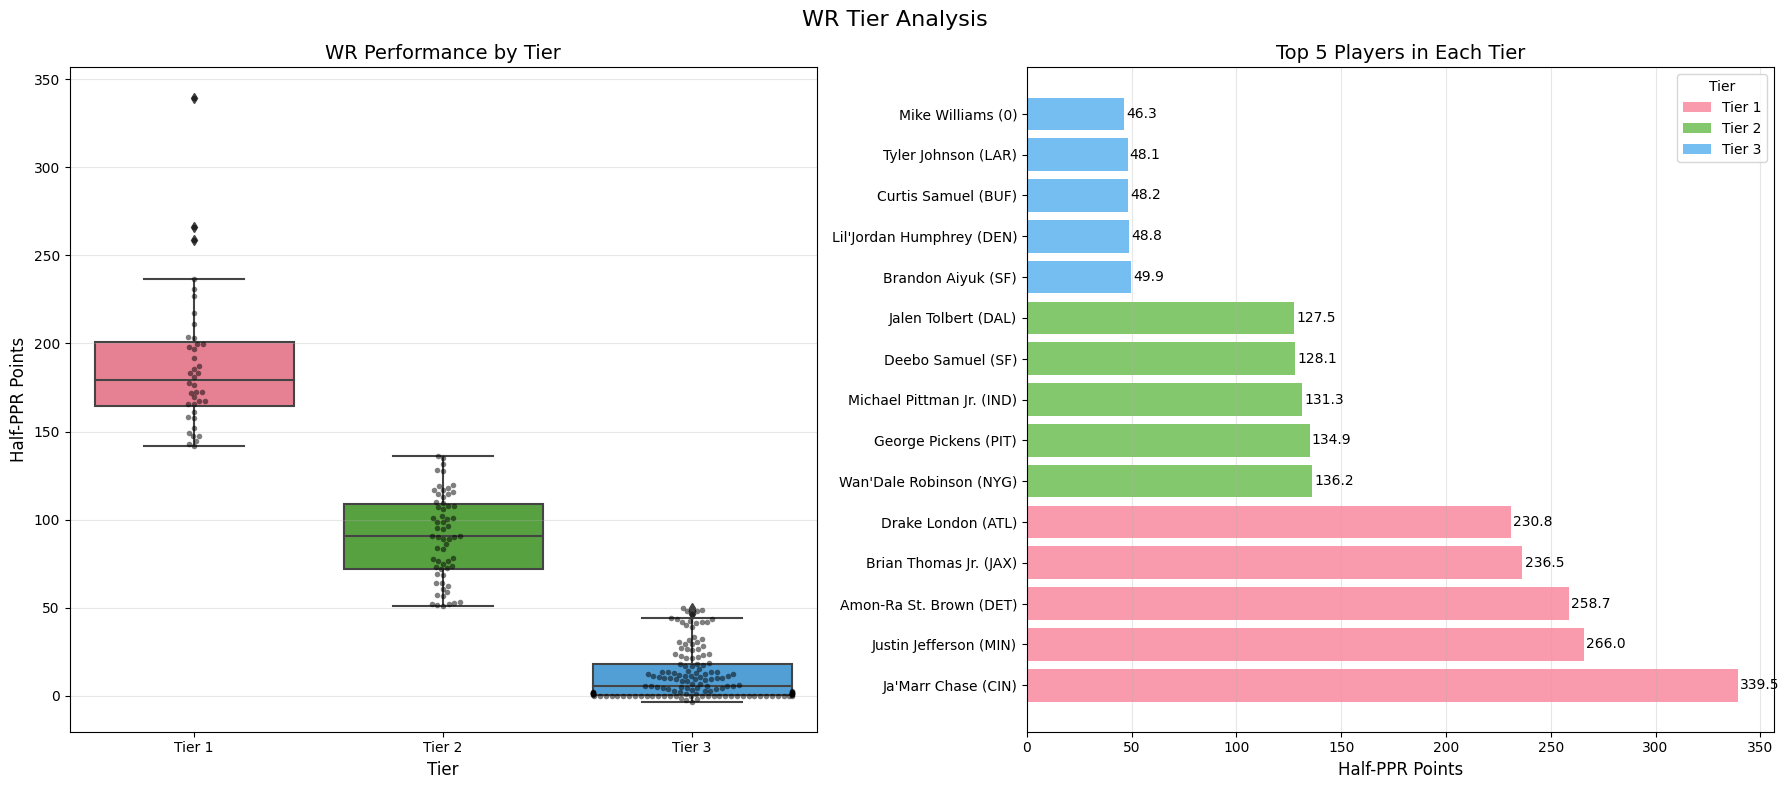

/Users/henrymarsh/Documents/fantasy_football_analysis/venv/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

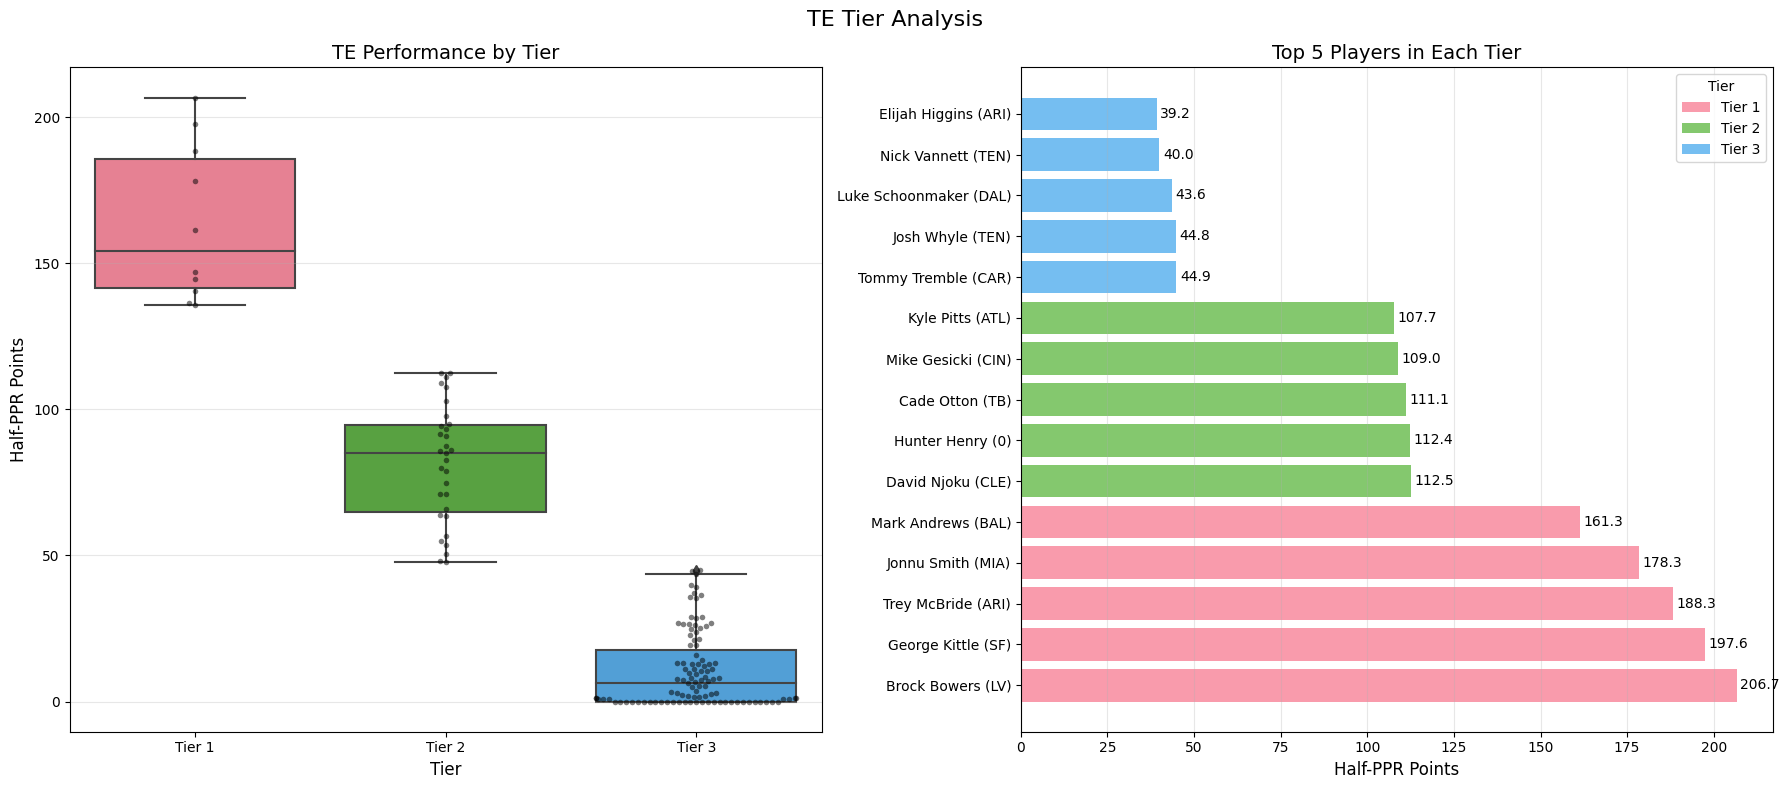

KeyError: "Columns not found: 'Yards_Per_Reception', 'YPRR'"

<Figure size 1200x800 with 0 Axes>

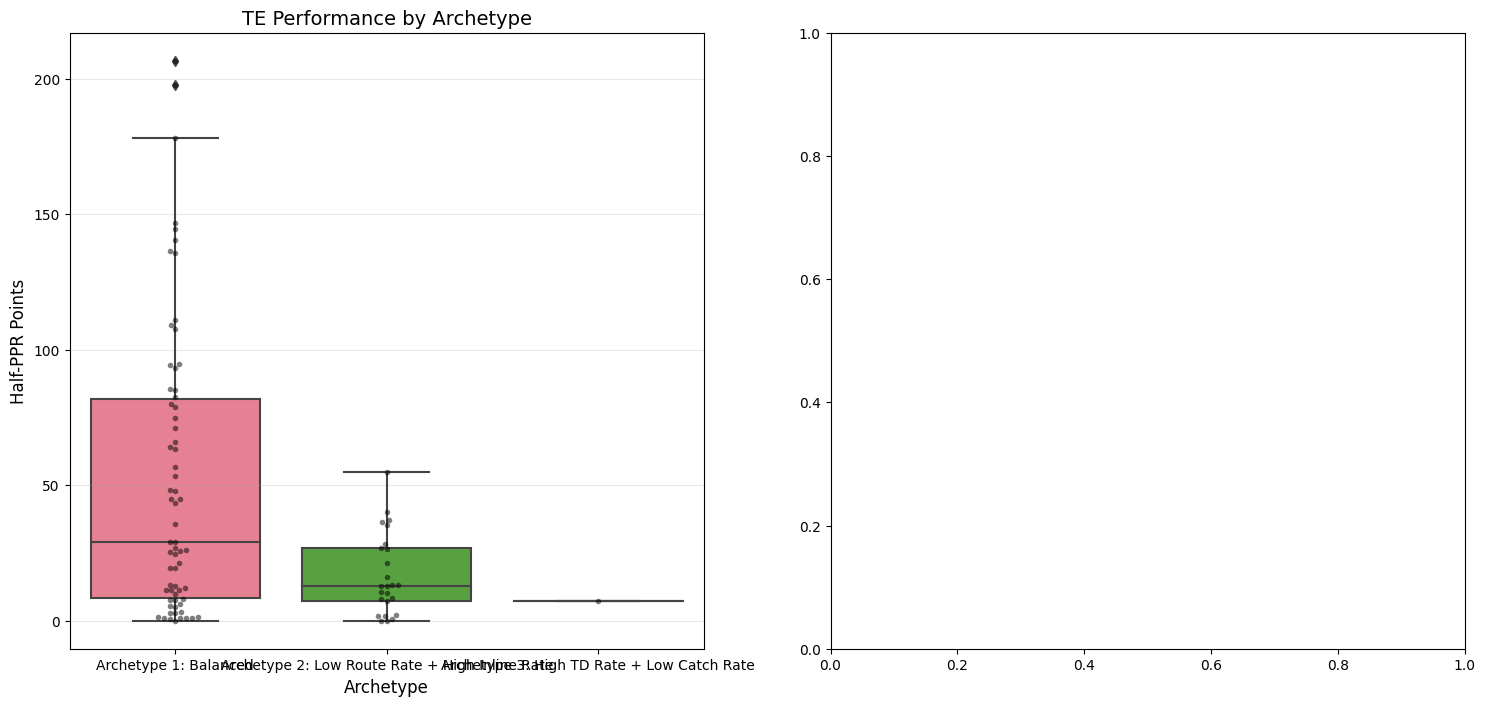

In [8]:
# 5. Create visualizations
# Plot player tiers
for pos in positions:
    tier_key = f"{pos}_tiers"
    if tier_key in tier_results:
        plt.figure(figsize=(12, 8))
        plot_player_tiers(tier_results[tier_key], pos)
        plt.tight_layout()
        plt.savefig(f'../outputs/figures/{pos}_tiers.png')
        plt.show()

# Plot player archetypes
for pos in positions:
    archetype_key = f"{pos}_archetypes"
    if archetype_key in archetype_results:
        plt.figure(figsize=(12, 8))
        plot_player_archetypes(archetype_results[archetype_key], pos, position_features[pos])
        plt.tight_layout()
        plt.savefig(f'../outputs/figures/{pos}_archetypes.png')
        plt.show()

# Plot tier expectations
if 'all_tier_expectations' in tier_expectations:
    plt.figure(figsize=(14, 10))
    plot_tier_expectations(tier_expectations['all_tier_expectations'])
    plt.tight_layout()
    plt.savefig('../outputs/figures/tier_expectations.png')
    plt.show()

In [ ]:
# 6. Save processed data
for key, df in tier_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

for key, df in archetype_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

for key, df in tier_expectations.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

print("Tiering and archetype analysis completed!")